In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.shape

(26707, 34)

In [4]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
median1=df['h1n1_worry'].median()
df['h1n1_worry']=df['h1n1_worry'].replace(np.nan,median1)


In [9]:
median2=df['h1n1_awareness'].median()
df['h1n1_awareness']=df['h1n1_awareness'].replace(np.nan,median2)

In [10]:
median3=df['antiviral_medication'].median()
df['antiviral_medication']=df['antiviral_medication'].replace(np.nan,median3)

In [11]:
median4=df['contact_avoidance'].median()
df['contact_avoidance']=df['contact_avoidance'].replace(np.nan,median4)

In [12]:
median5=df['bought_face_mask'].median()
df['bought_face_mask']=df['bought_face_mask'].replace(np.nan,median5)

In [13]:
median6=df['wash_hands_frequently'].median()
df['wash_hands_frequently']=df['wash_hands_frequently'].replace(np.nan,median6)

In [14]:
median7=df['avoid_large_gatherings'].median()
df['avoid_large_gatherings']=df['avoid_large_gatherings'].replace(np.nan,median7)

In [15]:
median8=df['reduced_outside_home_cont'].median()
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].replace(np.nan,median8)

In [16]:
median9=df['avoid_touch_face'].median()
df['avoid_touch_face']=df['avoid_touch_face'].replace(np.nan,median9)

In [17]:
median10=df['dr_recc_h1n1_vacc'].median()
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].replace(np.nan,median10)

In [18]:
median11=df['dr_recc_seasonal_vacc'].median()
df['dr_recc_seasonal_vacc']=df['dr_recc_seasonal_vacc'].replace(np.nan,median11)

In [19]:
median12=df['chronic_medic_condition'].median()
df['chronic_medic_condition']=df['chronic_medic_condition'].replace(np.nan,median12)

In [20]:
median13=df['cont_child_undr_6_mnths'].median()
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].replace(np.nan,median13)

In [21]:
median14=df['is_health_worker'].median()
df['is_health_worker']=df['is_health_worker'].replace(np.nan,median14)

In [22]:
median15=df['is_h1n1_vacc_effective'].median()
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].replace(np.nan,median15)

In [23]:
median16=df['is_h1n1_risky'].median()
df['is_h1n1_risky']=df['is_h1n1_risky'].replace(np.nan,median16)

In [24]:
median17=df['sick_from_h1n1_vacc'].median()
df['sick_from_h1n1_vacc']=df['sick_from_h1n1_vacc'].replace(np.nan,median17)

In [25]:
median18=df['is_seas_risky'].median()
df['is_seas_risky']=df['is_seas_risky'].replace(np.nan,median18)

In [26]:
median19=df['is_seas_vacc_effective'].median()
df['is_seas_vacc_effective']=df['is_seas_vacc_effective'].replace(np.nan,median19)

In [27]:
median20=df['sick_from_seas_vacc'].median()
df['sick_from_seas_vacc']=df['sick_from_seas_vacc'].replace(np.nan,median20)

In [28]:
median21=df['sick_from_seas_vacc'].median()
df['sick_from_seas_vacc']=df['sick_from_seas_vacc'].replace(np.nan,median21)

In [29]:
mode1=df["qualification"].mode().values[0]
df["qualification"]=df["qualification"].replace(np.nan,mode1)

In [30]:
mode2=df["income_level"].mode().values[0]
df["income_level"]=df["income_level"].replace(np.nan,mode2)

In [31]:
mode3=df["marital_status"].mode().values[0]
df["marital_status"]=df["marital_status"].replace(np.nan,mode3)

In [32]:
mode4=df["housing_status"].mode().values[0]
df["housing_status"]=df["housing_status"].replace(np.nan,mode4)

In [33]:
mode5=df["employment"].mode().values[0]
df["employment"]=df["employment"].replace(np.nan,mode5)

In [34]:
median21=df['no_of_adults'].median()
df['no_of_adults']=df['no_of_adults'].replace(np.nan,median21)

In [35]:
median22=df['no_of_children'].median()
df['no_of_children']=df['no_of_children'].replace(np.nan,median22)

In [36]:
df.drop(["has_health_insur"], axis=1, inplace=True)

In [37]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

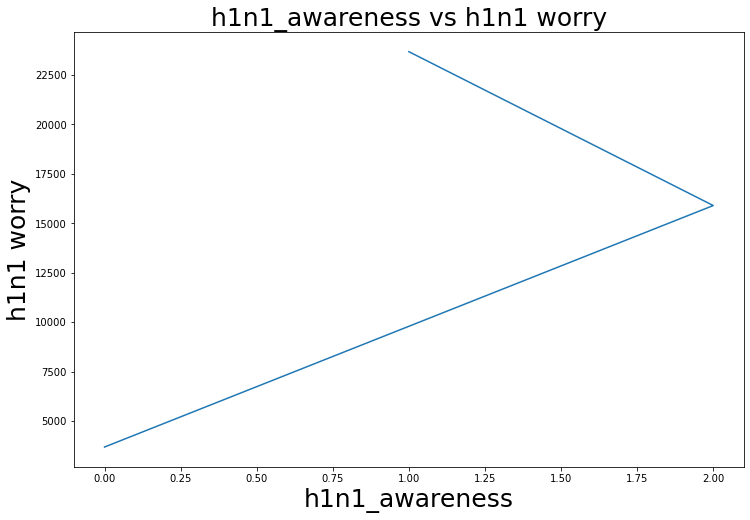

In [38]:
plt.figure(figsize = (12,8))
df.groupby("h1n1_awareness")["h1n1_worry"].sum().sort_values().plot()

plt.xlabel("h1n1_awareness", fontsize=25)
plt.ylabel("h1n1 worry", fontsize=25)
plt.title("h1n1_awareness vs h1n1 worry", fontsize=25)
plt.show()

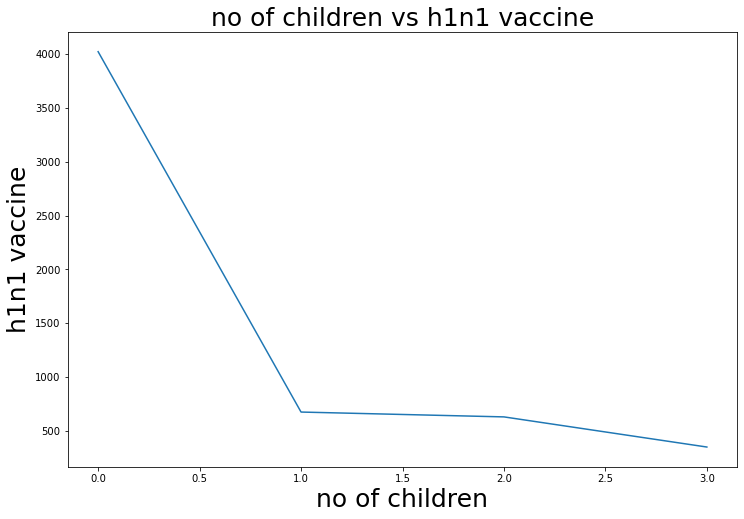

In [39]:
plt.figure(figsize = (12,8))
df.groupby("no_of_children")["h1n1_vaccine"].sum().sort_values().plot()

plt.xlabel("no of children", fontsize=25)
plt.ylabel("h1n1 vaccine", fontsize=25)
plt.title("no of children vs h1n1 vaccine", fontsize=25)
plt.show()

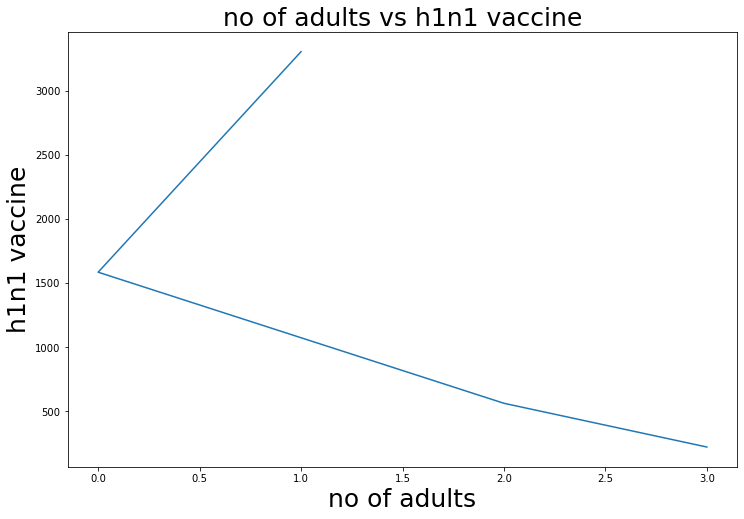

In [40]:
plt.figure(figsize = (12,8))
df.groupby("no_of_adults")["h1n1_vaccine"].sum().sort_values().plot()

plt.xlabel("no of adults", fontsize=25)
plt.ylabel("h1n1 vaccine", fontsize=25)
plt.title("no of adults vs h1n1 vaccine", fontsize=25)
plt.show()

In [41]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


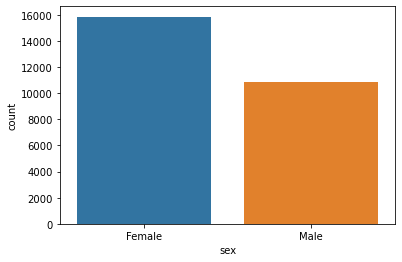

In [42]:
sns.countplot(x='sex',data=df)

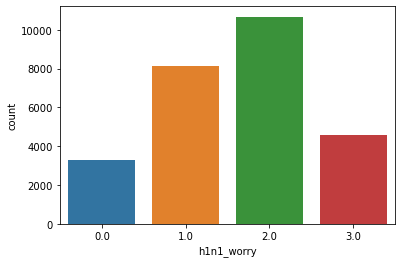

In [43]:
sns.countplot(x='h1n1_worry',data=df)

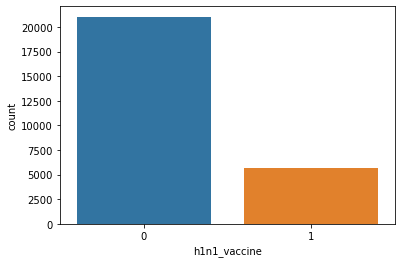

In [44]:
sns.countplot(x='h1n1_vaccine',data=df)

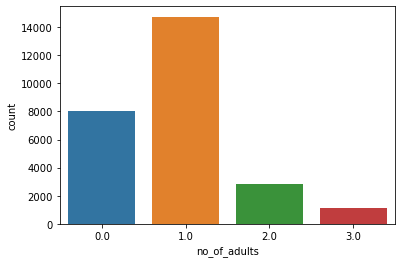

In [45]:
sns.countplot(x='no_of_adults',data=df)

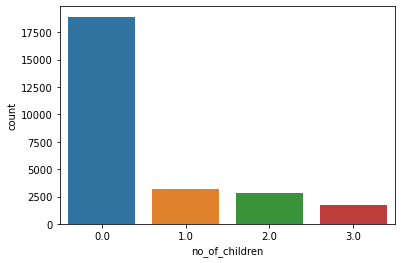

In [46]:
sns.countplot(x='no_of_children',data=df)

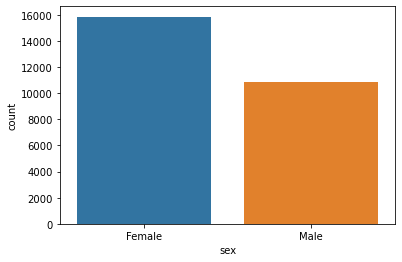

In [47]:
sns.countplot(x='sex',data=df)

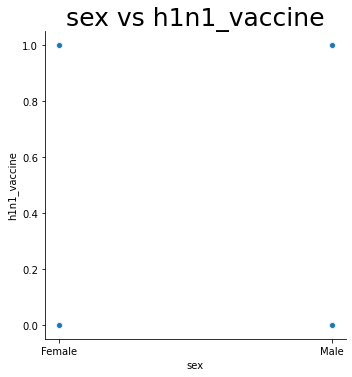

In [48]:
sns.relplot(data = df, kind = "scatter",x = "sex",y = "h1n1_vaccine")
plt.title("sex vs h1n1_vaccine" , fontsize=25)
plt.show()

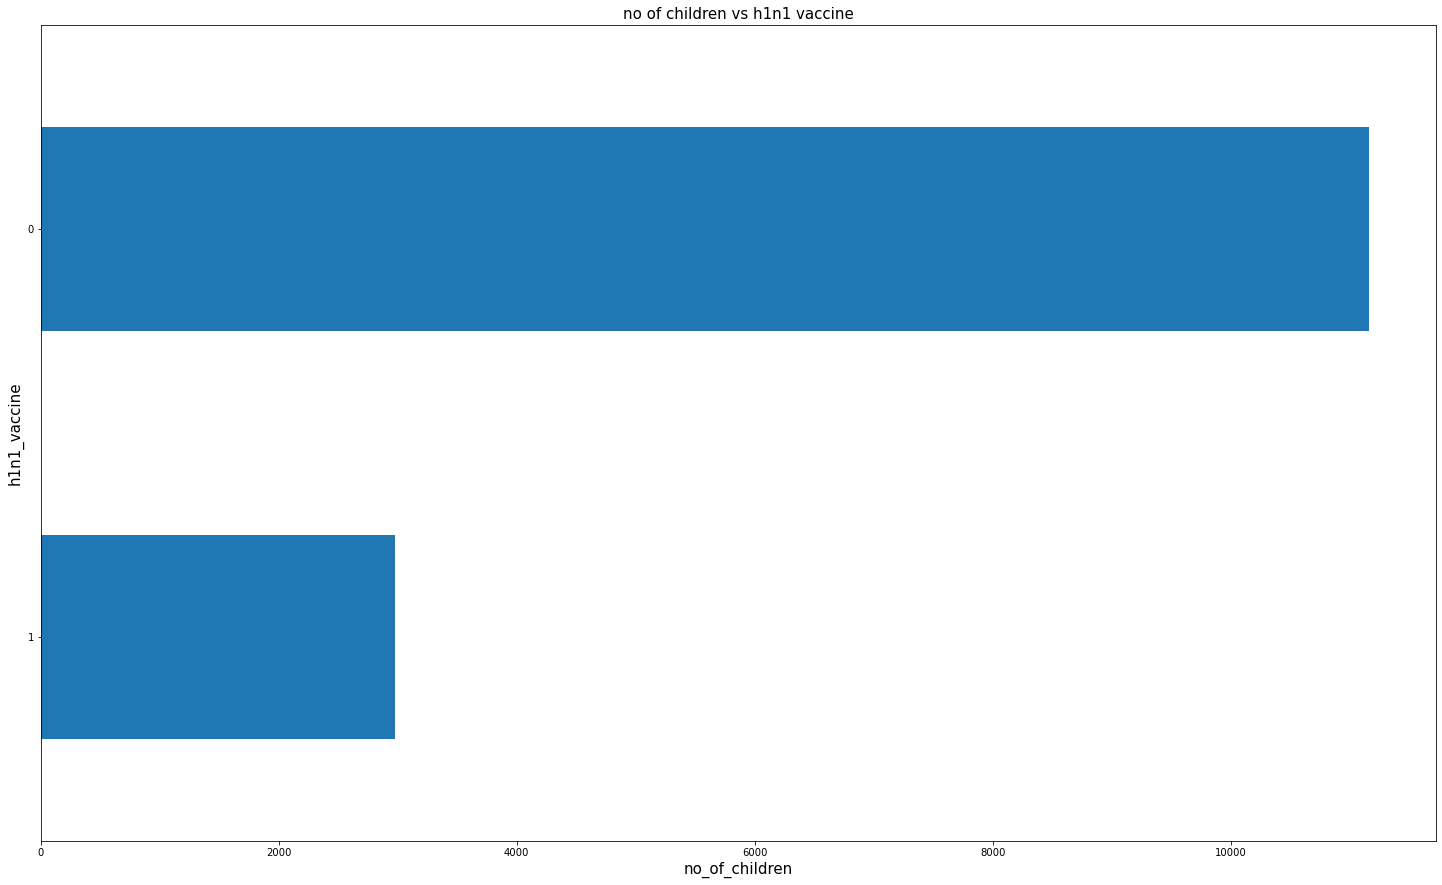

In [49]:
plt.figure(figsize=(25,15))
df.groupby("h1n1_vaccine")["no_of_children"].sum().sort_values().plot.barh()
plt.xlabel("no_of_children",fontsize =15)
plt.ylabel("h1n1_vaccine", fontsize =15)
plt.title("no of children vs h1n1 vaccine", fontsize = 15)
plt.show()

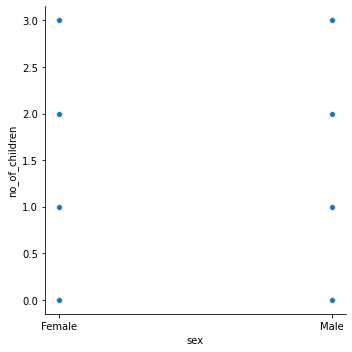

In [50]:
sns.relplot(x='sex',y='no_of_children',data=df)

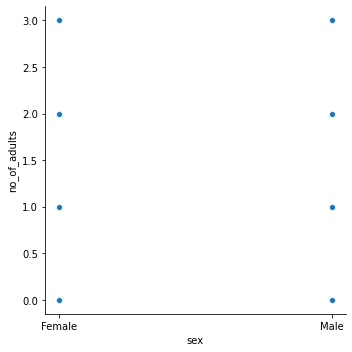

In [51]:
sns.relplot(x='sex',y='no_of_adults',data=df)

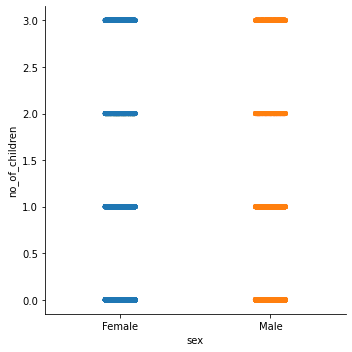

In [52]:
sns.catplot(y='no_of_children',x='sex',data=df)

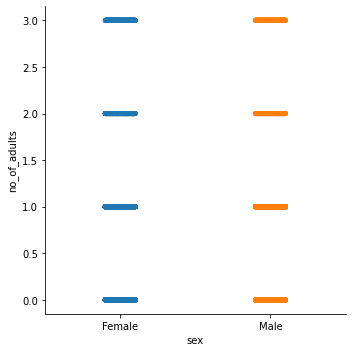

In [53]:
sns.catplot(y='no_of_adults',x='sex',data=df)

In [54]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

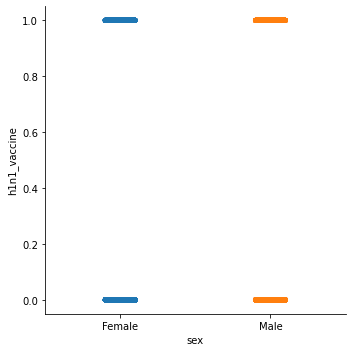

In [55]:
sns.catplot(y='h1n1_vaccine',x='sex',data=df)

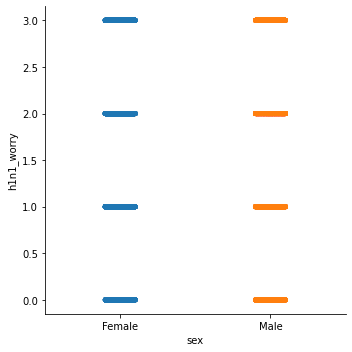

In [56]:
sns.catplot(y='h1n1_worry',x='sex',data=df)

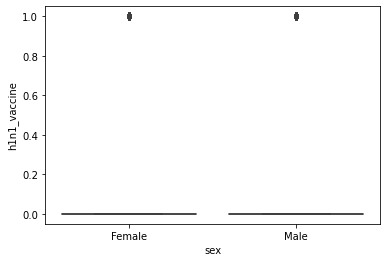

In [57]:
sns.boxplot(x='sex',y="h1n1_vaccine",data=df)

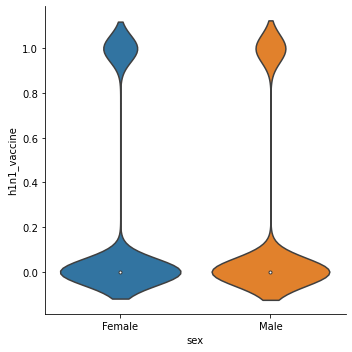

In [58]:
sns.catplot(y='h1n1_vaccine',x='sex',data=df,kind="violin")

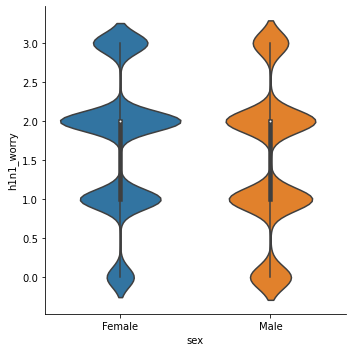

In [59]:
sns.catplot(y='h1n1_worry',x='sex',data=df,kind="violin")

In [60]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [61]:
pd.crosstab(df["h1n1_vaccine"],df["sex"])

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


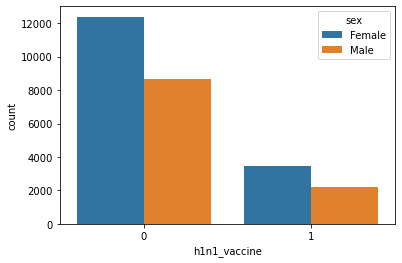

In [62]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

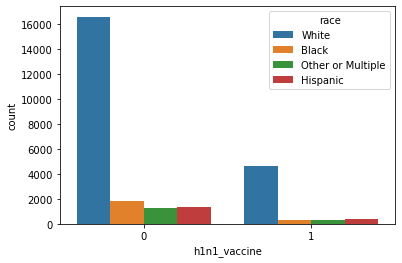

In [63]:
sns.countplot(x="h1n1_vaccine",hue="race",data=df)

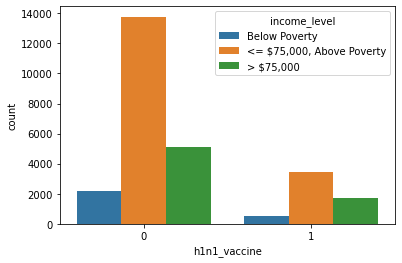

In [64]:
sns.countplot(x="h1n1_vaccine",hue="income_level",data=df)

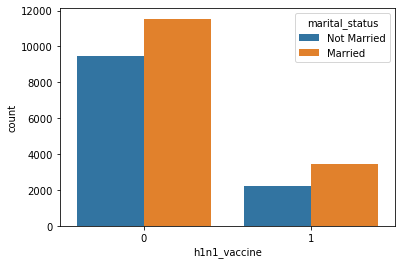

In [65]:
sns.countplot(x="h1n1_vaccine",hue="marital_status",data=df)

In [66]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

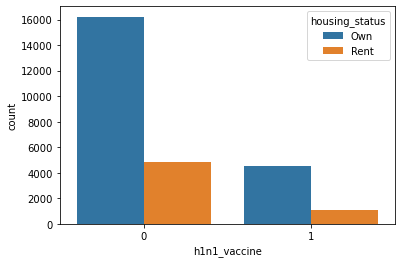

In [67]:
sns.countplot(x="h1n1_vaccine",hue="housing_status",data=df)

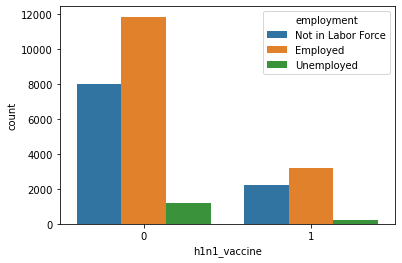

In [68]:
sns.countplot(x="h1n1_vaccine",hue="employment",data=df)

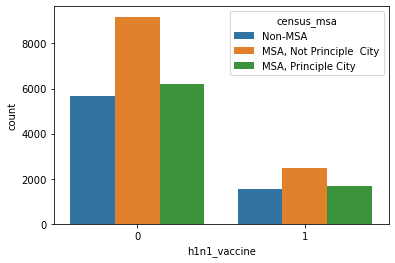

In [69]:
sns.countplot(x="h1n1_vaccine",hue="census_msa",data=df)

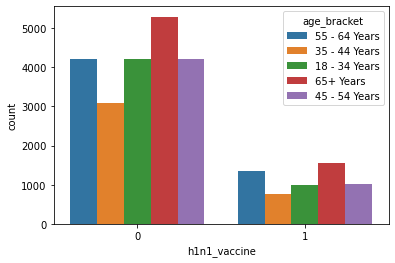

In [70]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)

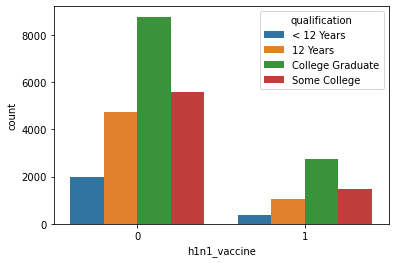

In [71]:
sns.countplot(x="h1n1_vaccine",hue="qualification",data=df)

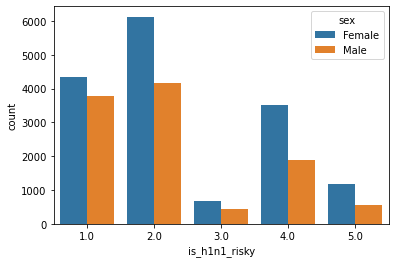

In [72]:
sns.countplot(x="is_h1n1_risky",hue="sex",data=df)

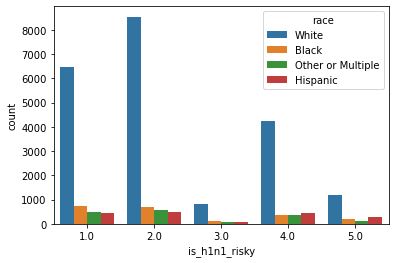

In [73]:
sns.countplot(x="is_h1n1_risky",hue="race",data=df)

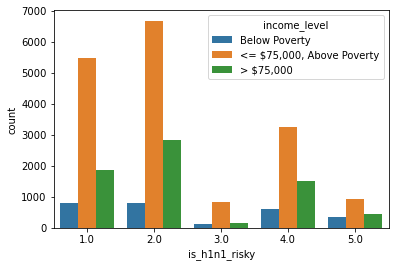

In [74]:
sns.countplot(x="is_h1n1_risky",hue="income_level",data=df)

In [75]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

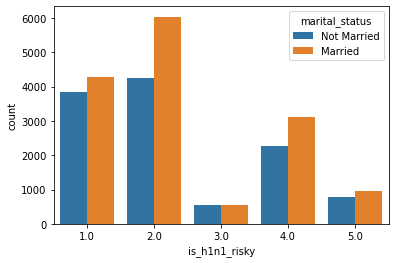

In [76]:
sns.countplot(x="is_h1n1_risky",hue="marital_status",data=df)

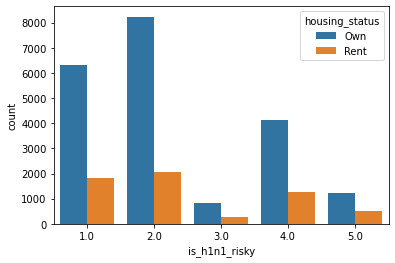

In [77]:
sns.countplot(x="is_h1n1_risky",hue="housing_status",data=df)

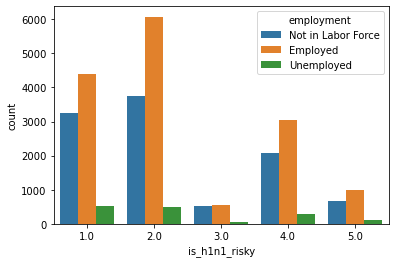

In [78]:
sns.countplot(x="is_h1n1_risky",hue="employment",data=df)

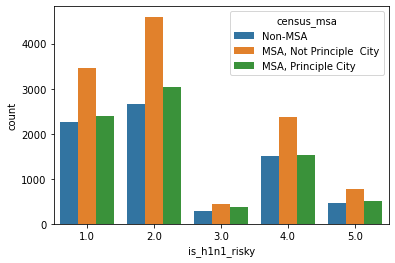

In [79]:
sns.countplot(x="is_h1n1_risky",hue="census_msa",data=df)

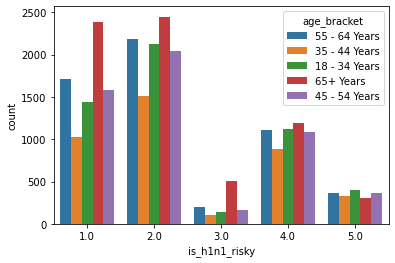

In [80]:
sns.countplot(x="is_h1n1_risky",hue="age_bracket",data=df)

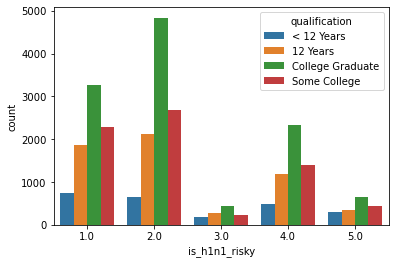

In [81]:
sns.countplot(x="is_h1n1_risky",hue="qualification",data=df)

In [82]:
#NOW PLOT FOR OTHER H1N1 
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

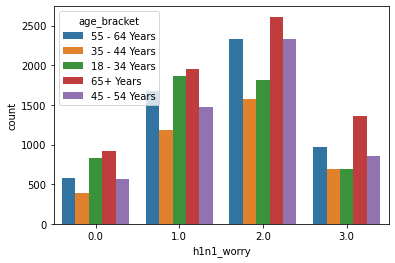

In [83]:
sns.countplot(x="h1n1_worry",hue="age_bracket",data=df)

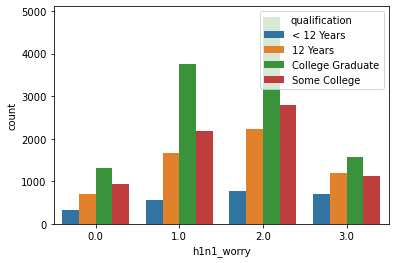

In [84]:
sns.countplot(x="h1n1_worry",hue="qualification",data=df)

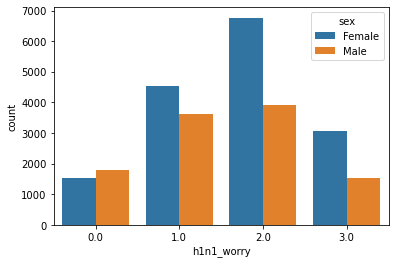

In [85]:
sns.countplot(x="h1n1_worry",hue="sex",data=df)

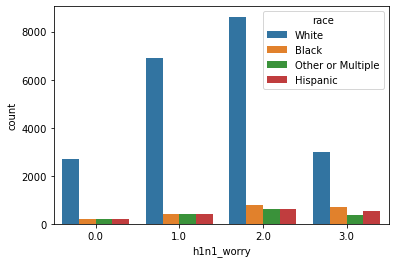

In [86]:
sns.countplot(x="h1n1_worry",hue="race",data=df)

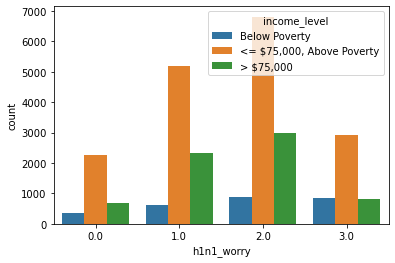

In [87]:
sns.countplot(x="h1n1_worry",hue="income_level",data=df)

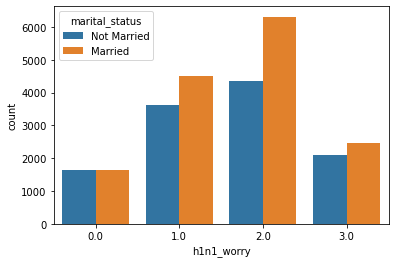

In [88]:
sns.countplot(x="h1n1_worry",hue="marital_status",data=df)

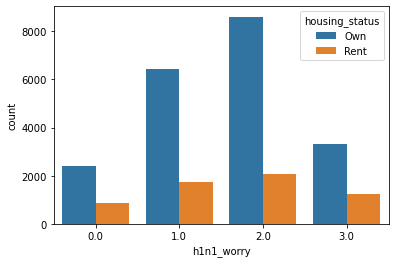

In [89]:
sns.countplot(x="h1n1_worry",hue="housing_status",data=df)

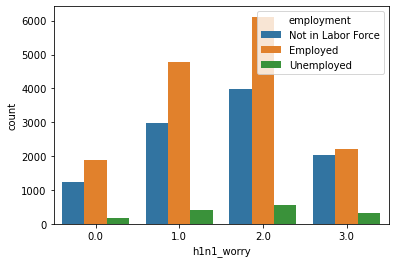

In [90]:
sns.countplot(x="h1n1_worry",hue="employment",data=df)

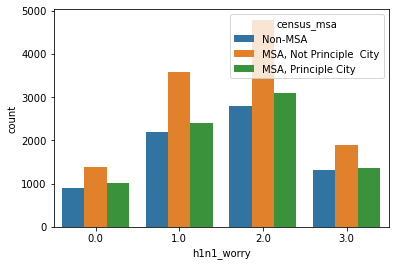

In [91]:
sns.countplot(x="h1n1_worry",hue="census_msa",data=df)

In [92]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

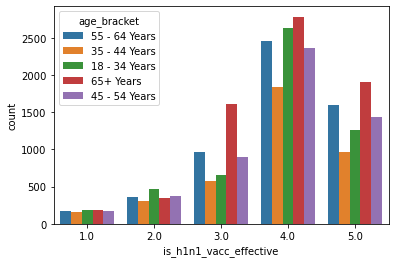

In [93]:
sns.countplot(x="is_h1n1_vacc_effective",hue="age_bracket",data=df)

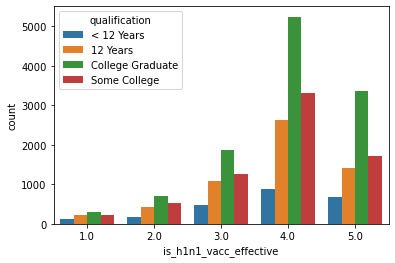

In [94]:
sns.countplot(x="is_h1n1_vacc_effective",hue="qualification",data=df)

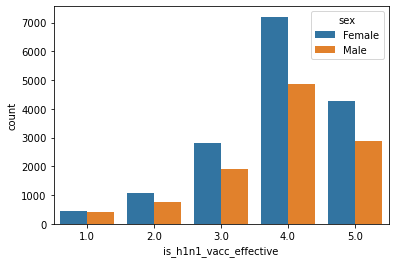

In [95]:
sns.countplot(x="is_h1n1_vacc_effective",hue="sex",data=df)

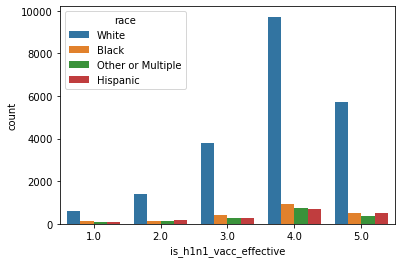

In [96]:
sns.countplot(x="is_h1n1_vacc_effective",hue="race",data=df)

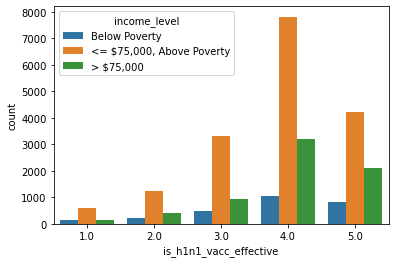

In [97]:
sns.countplot(x="is_h1n1_vacc_effective",hue="income_level",data=df)

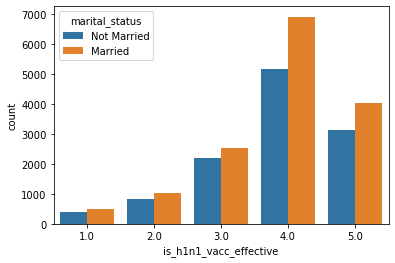

In [98]:
sns.countplot(x="is_h1n1_vacc_effective",hue="marital_status",data=df)

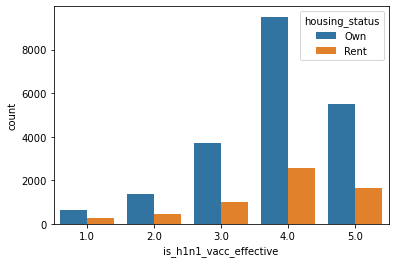

In [99]:
sns.countplot(x="is_h1n1_vacc_effective",hue="housing_status",data=df)

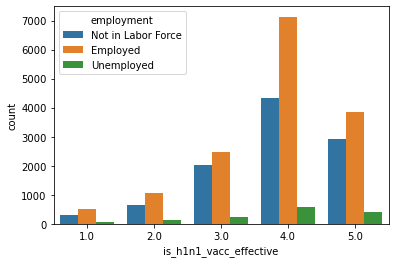

In [100]:
sns.countplot(x="is_h1n1_vacc_effective",hue="employment",data=df)

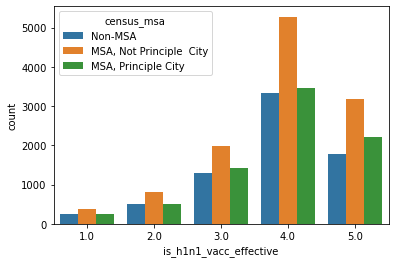

In [101]:
sns.countplot(x="is_h1n1_vacc_effective",hue="census_msa",data=df)

In [102]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [103]:
# sns.jointplot(x='no_of_passenger',y='amount' , data=df)

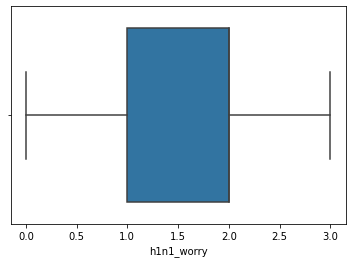

In [104]:
sns.boxplot(df.h1n1_worry)

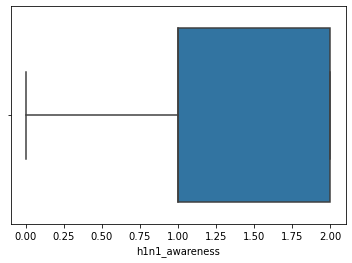

In [105]:
sns.boxplot(df.h1n1_awareness)

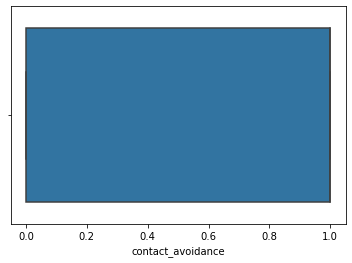

In [106]:
sns.boxplot(df.contact_avoidance)

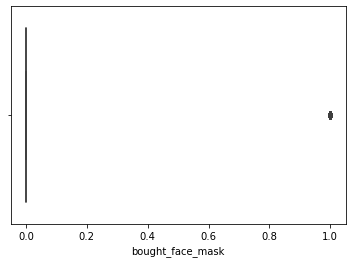

In [107]:
sns.boxplot(df.bought_face_mask)

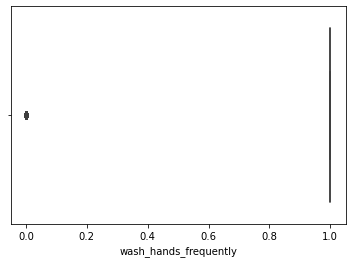

In [108]:
sns.boxplot(df.wash_hands_frequently)

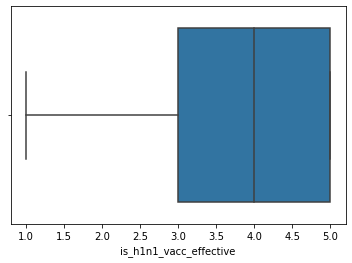

In [109]:
sns.boxplot(df.is_h1n1_vacc_effective)

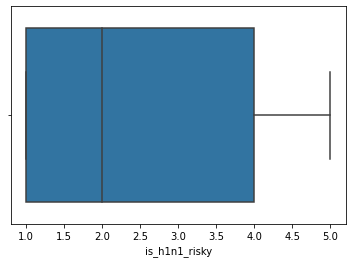

In [110]:
sns.boxplot(df.is_h1n1_risky)

In [111]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

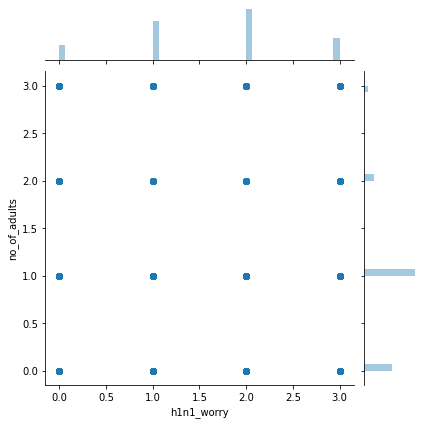

In [112]:
sns.jointplot(y='no_of_adults',x='h1n1_worry' , data=df)

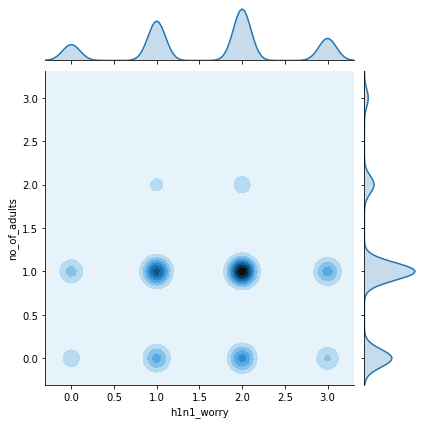

In [113]:
sns.jointplot(y='no_of_adults',x='h1n1_worry' , data=df,kind="kde")

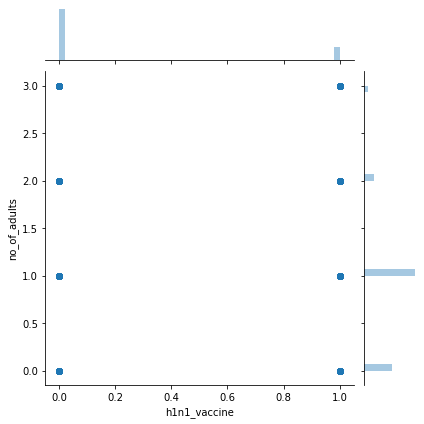

In [114]:
sns.jointplot(x='h1n1_vaccine',y='no_of_adults' , data=df)

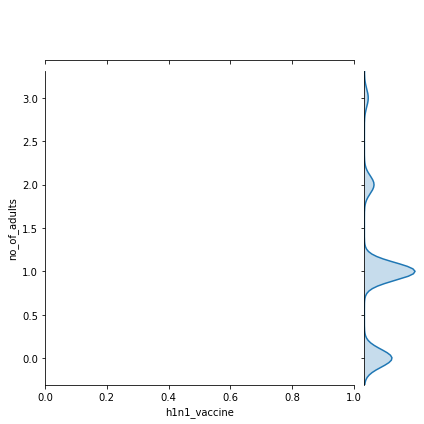

In [115]:
sns.jointplot(x='h1n1_vaccine',y='no_of_adults' , data=df,kind="kde")

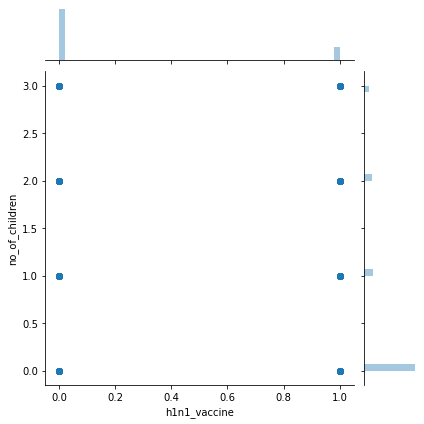

In [116]:
sns.jointplot(x='h1n1_vaccine',y='no_of_children' , data=df)

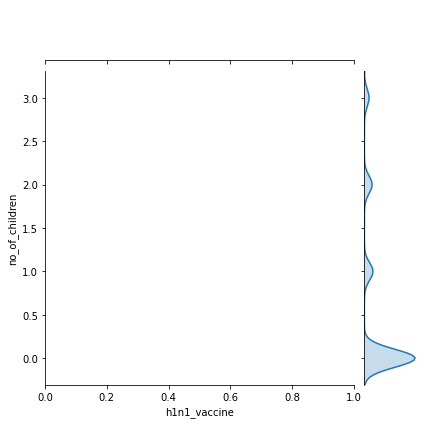

In [117]:
sns.jointplot(x='h1n1_vaccine',y='no_of_children' , data=df,kind="kde")

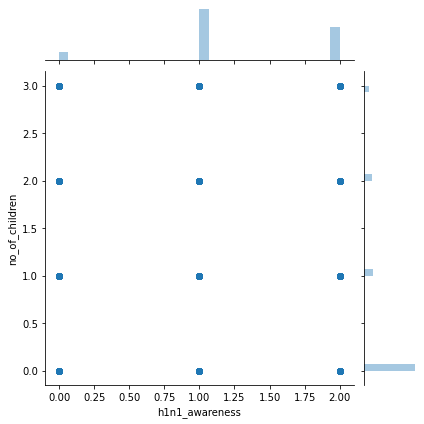

In [118]:
sns.jointplot(x='h1n1_awareness',y='no_of_children' , data=df)

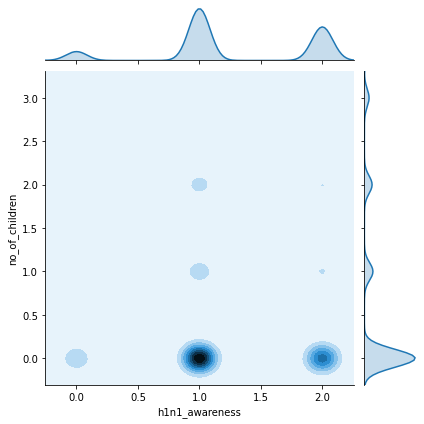

In [119]:
sns.jointplot(x='h1n1_awareness',y='no_of_children' , data=df,kind="kde")

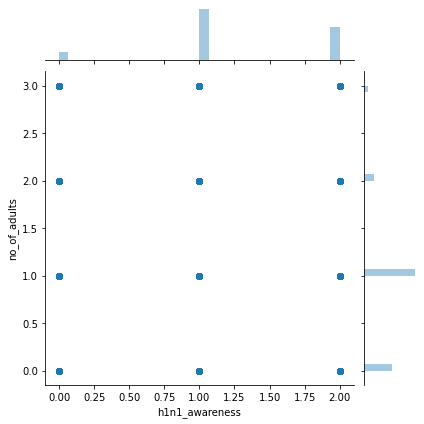

In [120]:
sns.jointplot(x='h1n1_awareness',y='no_of_adults' , data=df)

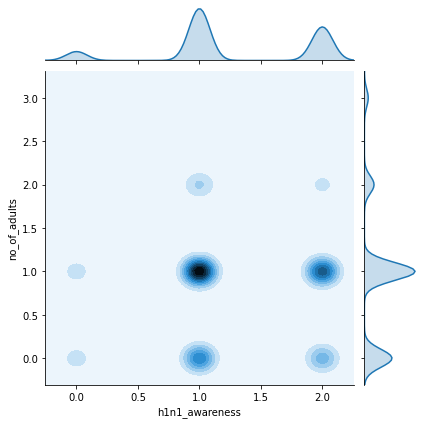

In [121]:
sns.jointplot(x='h1n1_awareness',y='no_of_adults' , data=df,kind="kde")

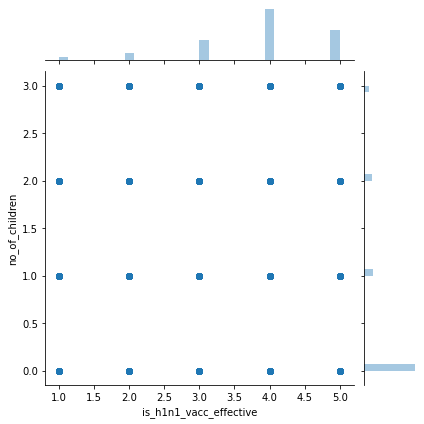

In [122]:
sns.jointplot(x='is_h1n1_vacc_effective',y='no_of_children' , data=df)

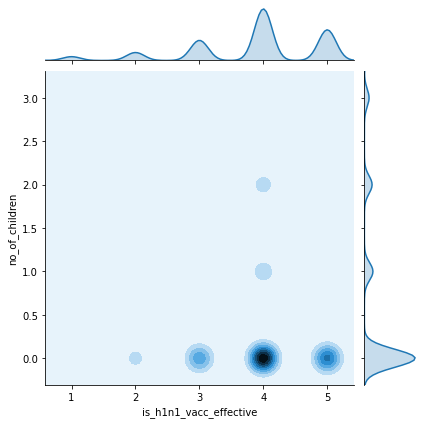

In [123]:
sns.jointplot(x='is_h1n1_vacc_effective',y='no_of_children' , data=df,kind="kde")

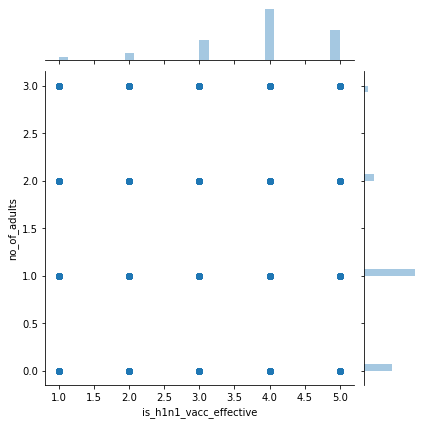

In [124]:
sns.jointplot(x='is_h1n1_vacc_effective',y='no_of_adults' , data=df)

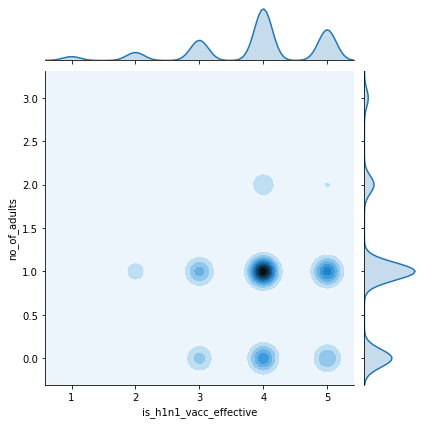

In [125]:
sns.jointplot(x='is_h1n1_vacc_effective',y='no_of_adults' , data=df,kind="kde")

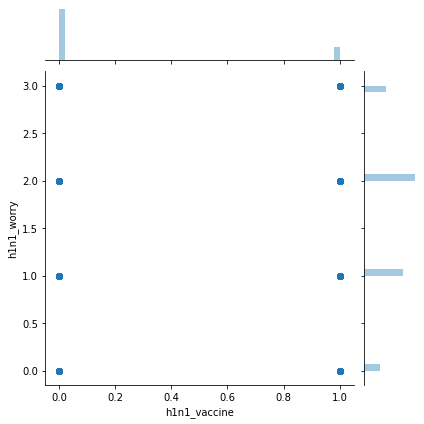

In [126]:
sns.jointplot(x='h1n1_vaccine',y='h1n1_worry' , data=df)

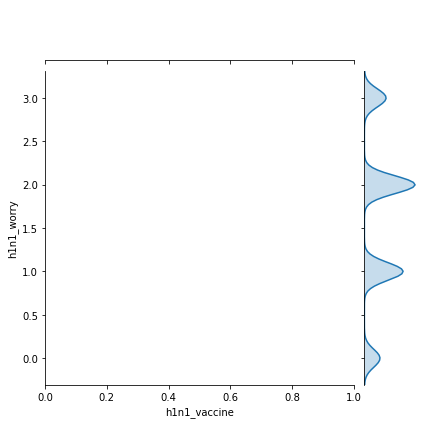

In [127]:
sns.jointplot(x='h1n1_vaccine',y='h1n1_worry' , data=df,kind="kde")

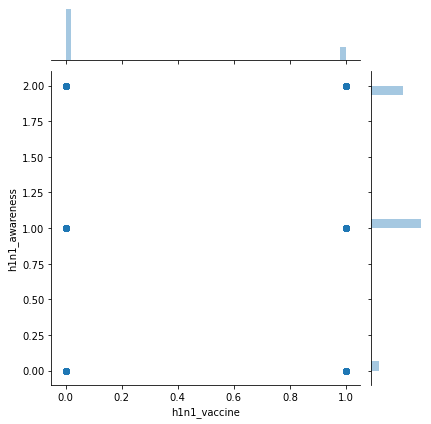

In [128]:
sns.jointplot(x='h1n1_vaccine',y='h1n1_awareness' , data=df)

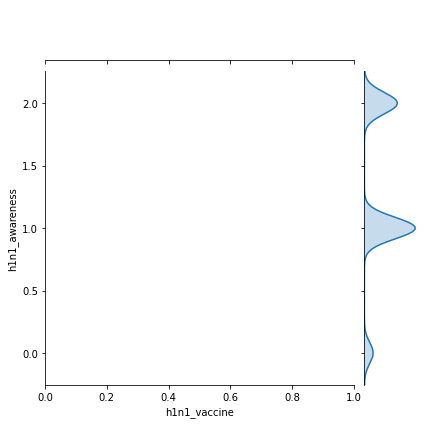

In [129]:
sns.jointplot(x='h1n1_vaccine',y='h1n1_awareness' , data=df,kind="kde")

In [130]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

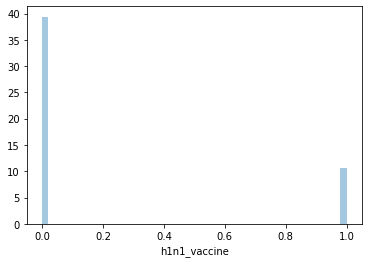

In [131]:
sns.distplot(df.h1n1_vaccine)

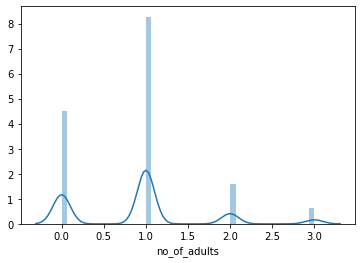

In [132]:
sns.distplot(df.no_of_adults)

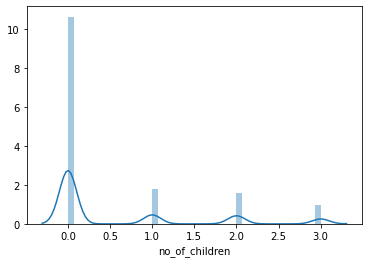

In [133]:
sns.distplot(df.no_of_children)

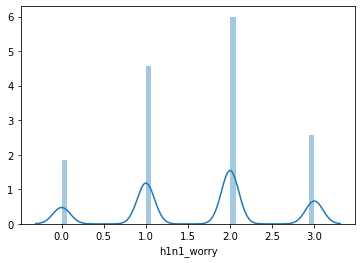

In [134]:
sns.distplot(df.h1n1_worry)

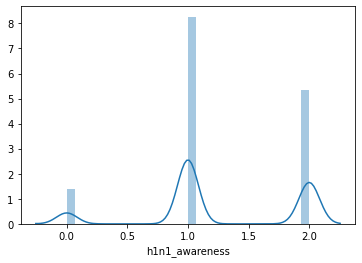

In [135]:
sns.distplot(df.h1n1_awareness)

In [136]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

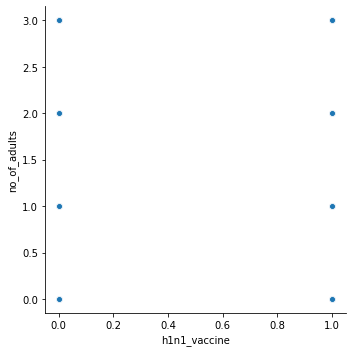

In [137]:
sns.relplot(y='no_of_adults',x='h1n1_vaccine',data=df)

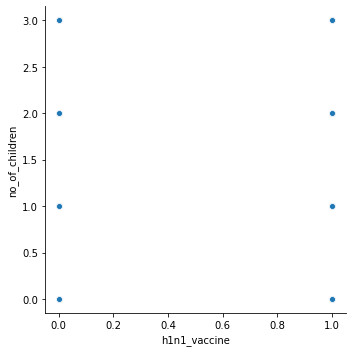

In [138]:
sns.relplot(y='no_of_children',x='h1n1_vaccine',data=df)

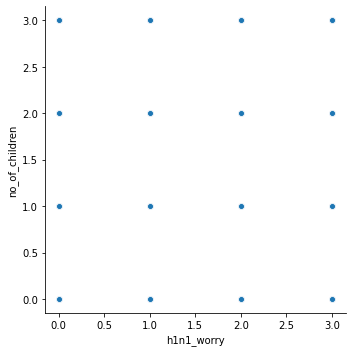

In [139]:
sns.relplot(y='no_of_children',x='h1n1_worry',data=df)

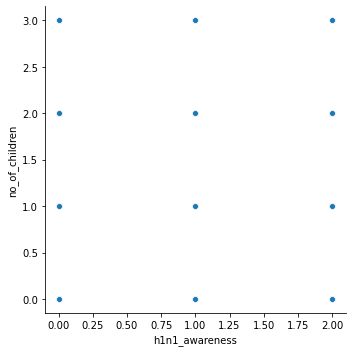

In [140]:
sns.relplot(y='no_of_children',x='h1n1_awareness',data=df)

In [141]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [142]:
df.drop("is_health_worker", axis=1, inplace=True)


In [143]:
df.drop("is_seas_vacc_effective", axis=1, inplace=True)


In [144]:
df.drop("is_seas_risky", axis=1, inplace=True)


In [145]:
df.drop("sick_from_seas_vacc", axis=1, inplace=True)


In [150]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
n

In [151]:
df.drop("qualification", axis=1, inplace=True)


In [152]:
df.drop("race", axis=1, inplace=True)


In [153]:
df.drop("sex", axis=1, inplace=True)


In [158]:
df.drop("census_msa", axis=1, inplace=True)


In [160]:
df.drop("income_level", axis=1, inplace=True)


In [161]:
df.drop("marital_status", axis=1, inplace=True)


In [162]:
df.drop("housing_status", axis=1, inplace=True)


In [163]:
df.drop("employment", axis=1, inplace=True)


In [167]:
df.drop("age_bracket", axis=1, inplace=True)


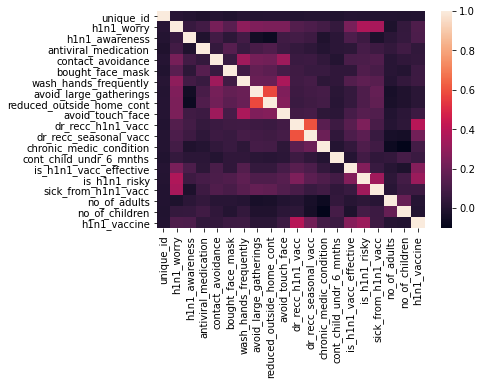

In [171]:
corr=df.corr()
sns.heatmap(corr)

# SPLITTING DATA

In [172]:
X=df.drop(['h1n1_vaccine'],axis=1)

y=df[['h1n1_vaccine']] 

In [275]:
X.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,5.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,0.0


In [276]:
y.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [277]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [174]:
reg_model=LogisticRegression()

reg_model.fit(X_train,y_train)

LogisticRegression()

In [175]:
reg_model.score(X_train,y_train)

0.8106344281587675

In [176]:
reg_model.score(X_test,y_test)

0.8128041931860727

In [177]:
from sklearn.svm import SVC

In [201]:
svc_model1=SVC()
svc_model1.fit(X_train,y_train)

SVC()

In [202]:
svc_model1.score(X_train,y_train)

0.786509040333797

In [203]:
svc_model1.score(X_test,y_test)

0.7899663047547735

In [192]:
svc_model=SVC(kernel='linear',C=2,gamma=5)
svc_model.fit(X_train,y_train)

SVC(C=2, gamma=5, kernel='linear')

In [193]:
svc_model.score(X_train,y_train)

0.7980635498020755

In [194]:
svc_model.score(X_test,y_test)

0.8024460252090353

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [252]:
model2=DecisionTreeClassifier(max_depth=12, min_samples_split=3, min_samples_leaf=6)

In [253]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, min_samples_split=3)

In [254]:
model2.score(X_train,y_train) ## MODEL IS OVERFITTING 


0.8617738311757783

In [255]:
model2.score(X_test,y_test)

0.8133033820042431

In [256]:
from sklearn.ensemble import BaggingClassifier


In [272]:

bgcl=BaggingClassifier(n_estimators=50,base_estimator=model2,random_state=1)
bgcl=bgcl.fit(X_train,y_train)


In [273]:
bgcl.score(X_train,y_train)

0.8764309404086873

In [274]:
bgcl.score(X_test,y_test)

0.8331461375265194

#                     

BAGGING CLASSIFIER HAS HIGHEST SCORE